In [29]:
import pandas as pd
import numpy as np
import os
import datetime
from dateutil.relativedelta import relativedelta

In [30]:
data = pd.read_csv('/opt/ml/code/input/train.csv', parse_dates=['order_date'])
data.order_date = pd.to_datetime(data.order_date)
data['ym'] = data.order_date.dt.strftime('%Y-%m')
data = data.drop(columns=['order_id', 'product_id', 'description'])
data

,quantity,order_date,price,customer_id,country,total,ym
0,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100,2009-12
1,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
2,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
3,48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200,2009-12
4,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000,2009-12
...,...,...,...,...,...,...,...
780497,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025,2011-11
780498,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285,2011-11
780499,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625,2011-11
780500,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175,2011-11


In [31]:
categories = ['total']

df = data.copy()
df = df.groupby(['customer_id', 'ym'])[categories].sum().reset_index()

new_df = pd.pivot_table(data=df,
                        values=categories,
                        index='customer_id',
                        columns='ym',
                        fill_value=0)['total']


In [32]:
new_df

ym,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,187.2750,-22.275,0.000,44.6325,0.000,0.0000,-285.9285,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
12347,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,1049.8125,0.000,631.158,0.0000,965.1015,0.000,2135.6280,0.0000
12348,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,366.564,...,0.0000,0.0,605.5500,0.000,0.000,0.0000,0.0000,511.500,0.0000,0.0000
12349,-39.8475,0.000,0.000,0.0000,1763.058,330.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,2899.9575
12350,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,551.7600,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0000,0.000,159.885,387.9480,0.000,0.0000,0.0000,0.0,151.800,0.000,...,166.5675,0.0,190.7400,140.613,489.258,230.8185,0.0000,222.585,186.4335,1052.2215
18284,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
18285,0.0000,0.000,704.550,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000


In [46]:
overt

ym
2009-12     745
2010-01     564
2010-02     612
2010-03     801
2010-04     757
2010-05     736
2010-06     778
2010-07     712
2010-08     710
2010-09     927
2010-10    1237
2010-11    1307
2010-12     683
2011-01     566
2011-02     569
2011-03     757
2011-04     655
2011-05     834
2011-06     748
2011-07     730
2011-08     737
2011-09    1043
2011-10    1105
2011-11    1320
dtype: int64

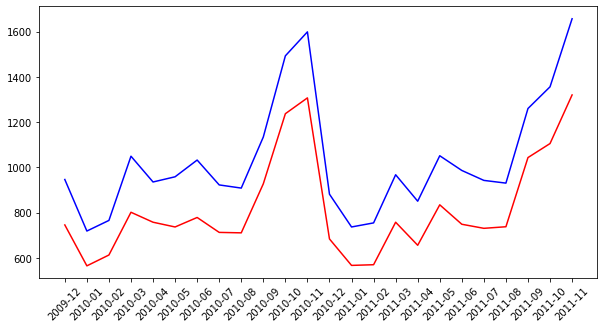

In [48]:
import matplotlib.pyplot as plt

df = new_df.copy()

over_300 = (df > 300).replace(False, np.NaN).count(axis=0)
over_0 = (df > 0).replace(False, np.NaN).count(axis=0)

plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
plt.plot(over_300.index, over_300.values, color='red')
plt.plot(over_0.index, over_0.values, color='blue')
plt.show()

In [ ]:
total_pred = new_df.replace(0, np.NaN).mean(axis=1)
total_pred = (total_pred > 300).astype(int).sort_index()
total_pred.value_counts()

In [ ]:
new_df.loc[12347, :]

In [ ]:
new_df[new_df > 0] = 1
new_df[new_df < 0] = 0
new_df

In [ ]:
pd.concat([new_df, new_df.cumsum(axis=1)], axis=1)

In [176]:
new_df.cumsum(axis=1).skew(axis=1)

customer_id
12346   -2.421860
12347    0.570013
12348    0.236192
12349   -1.037731
12350    0.361030
           ...   
18283    0.570029
18284   -0.361030
18285   -3.219960
18286   -0.755148
18287   -0.101273
Length: 5914, dtype: float64

In [175]:
new_df.skew(axis=1)

customer_id
12346    3.219960
12347    0.978979
12348    1.533957
12349    1.910389
12350    4.898979
           ...   
18283   -0.178611
18284    4.898979
18285    4.898979
18286    3.219960
18287    1.533957
Length: 5914, dtype: float64

In [67]:
status_thres = 20
target_date = '2011-11'
label_values = new_df[target_date]
label = (label_values > status_thres).astype(int)
label = label.sort_index().to_frame(name='status_label').reset_index()
label

,customer_id,status_label
0,12346,0
1,12347,0
2,12348,0
3,12349,1
4,12350,0
...,...,...
5909,18283,1
5910,18284,0
5911,18285,0
5912,18286,0


In [232]:
new_df

ym,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,187.2750,-22.275,0.000,44.6325,0.000,0.0000,-285.9285,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
12347,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,1049.8125,0.000,631.158,0.0000,965.1015,0.000,2135.6280,0.0000
12348,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,366.564,...,0.0000,0.0,605.5500,0.000,0.000,0.0000,0.0000,511.500,0.0000,0.0000
12349,-39.8475,0.000,0.000,0.0000,1763.058,330.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,2899.9575
12350,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,551.7600,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0000,0.000,159.885,387.9480,0.000,0.0000,0.0000,0.0,151.800,0.000,...,166.5675,0.0,190.7400,140.613,489.258,230.8185,0.0000,222.585,186.4335,1052.2215
18284,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
18285,0.0000,0.000,704.550,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000


In [233]:
new_df.loc[18023, :]

ym
2009-12       0.000
2010-01       0.000
2010-02       0.000
2010-03       0.000
2010-04       0.000
2010-05       0.000
2010-06   -5360.619
2010-07       0.000
2010-08       0.000
2010-09       0.000
2010-10       0.000
2010-11       0.000
2010-12       0.000
2011-01       0.000
2011-02       0.000
2011-03       0.000
2011-04       0.000
2011-05       0.000
2011-06       0.000
2011-07       0.000
2011-08       0.000
2011-09       0.000
2011-10       0.000
2011-11       0.000
Name: 18023, dtype: float64

In [230]:
status_thres = 0
total_thres = 270
middle_thres = 200

df = new_df.copy()
label = df[df > status_thres].mean(axis=1)
label[label < middle_thres] = 0
label[(label > middle_thres) & (label < total_thres)] = 0.5
label[label >= total_thres] = 1
label = label.sort_index().to_frame(name='total_label').reset_index()
label

,customer_id,total_label
0,12346,0.0
1,12347,1.0
2,12348,1.0
3,12349,1.0
4,12350,1.0
...,...,...
5909,18283,1.0
5910,18284,1.0
5911,18285,1.0
5912,18286,1.0


In [44]:
label.value_counts()

0    4259
1    1655
Name: 2011-11, dtype: int64

In [81]:
label = df.reset_index()['customer_id'].to_frame()
label['label'] = 0
label

,customer_id,label
0,12346,0
1,12346,0
2,12346,0
3,12346,0
4,12346,0
...,...,...
26302,18287,0
26303,18287,0
26304,18287,0
26305,18287,0


In [210]:
label

,customer_id,label
0,12346,0
1,12346,0
2,12346,0
3,12346,0
4,12346,0
...,...,...
26302,18287,0
26303,18287,0
26304,18287,0
26305,18287,0


In [82]:
new_df

ym,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,187.2750,-22.275,0.000,44.6325,0.000,0.0000,-285.9285,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
12347,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,1049.8125,0.000,631.158,0.0000,965.1015,0.000,2135.6280,0.0000
12348,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,366.564,...,0.0000,0.0,605.5500,0.000,0.000,0.0000,0.0000,511.500,0.0000,0.0000
12349,-39.8475,0.000,0.000,0.0000,1763.058,330.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,2899.9575
12350,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,551.7600,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0000,0.000,159.885,387.9480,0.000,0.0000,0.0000,0.0,151.800,0.000,...,166.5675,0.0,190.7400,140.613,489.258,230.8185,0.0000,222.585,186.4335,1052.2215
18284,0.0000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
18285,0.0000,0.000,704.550,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000


In [185]:
start_date = pd.to_datetime('2009-12')
target_date = pd.to_datetime('2011-12')
dt_diff = []
for customer_id, datas in new_df.iterrows():
    start = start_date
    end = start_date
    
    for date, value in datas.items():
        if value > 0 and start == start_date:
            start = pd.to_datetime(date)
        if value > 0:
            end = pd.to_datetime(date)
            
    if start == end:
        end = pd.to_datetime(target_date)
    dt_diff.append(int((end - start).total_seconds()))

print(len(dt_diff))

5914


In [183]:
dt_diff = np.array(dt_diff)
my = new_df.copy()
s = scaler.fit_transform(dt_diff.reshape(-1, 1))
my['diff'] = s
my 

ym,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,diff
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.250130
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.029135
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.029135
12349,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.966366
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.240827
18284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254629
18285,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.380383


In [202]:
def calculate_date_diff(df_original, start_date, target_date):
    df = df_original.copy()

    start_date = pd.to_datetime(start_date)
    target_date = pd.to_datetime(target_date)
    
    dt_diff = []
    for customer_id, datas in df.iterrows():
        start = start_date
        end = start_date
        
        for date, value in datas.items():
            if value > 0 and start == start_date:
                start = pd.to_datetime(date)
            if value > 0:
                end = pd.to_datetime(date)
                
        if start == end:
            end = pd.to_datetime(target_date)    
        dt_diff.append(int((end - start).total_seconds()))

    dt_diff = np.array(dt_diff).reshape(-1, 1)
    scaler = StandardScaler()
    dt_diff = scaler.fit_transform(dt_diff)

    return dt_diff

df = new_df.copy()
start_date='2009-12'
target_date='2011-12'

df_skew = df.skew(axis=1)
df_cumsum = df.cumsum(axis=1)
df_cumsum.columns = [f"c_{x}" for x in df_cumsum.columns]
cumsum_skew = df_cumsum.skew(axis=1)
date_diff = calculate_date_diff(df, start_date=start_date, target_date=target_date)

df = pd.concat([df, df_cumsum], axis=1)
df['skew'] = df_skew
df['cumsum_skew'] = cumsum_skew
df['date_diff'] = date_diff

df['recent'] = df[]
df

,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,c_2011-05,c_2011-06,c_2011-07,c_2011-08,c_2011-09,c_2011-10,c_2011-11,skew,cumsum_skew,date_diff
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.219960,-2.421860,1.250130
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,5.0,6.0,6.0,7.0,7.0,0.978979,0.570013,-0.029135
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,1.533957,0.236192,-0.029135
12349,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,1.910389,-1.037731,0.966366
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.898979,0.361030,-0.317551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,8.0,9.0,10.0,10.0,11.0,12.0,13.0,-0.178611,0.570029,1.240827
18284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.898979,-0.361030,0.254629
18285,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.898979,-3.219960,1.380383


In [204]:
df.drop(columns='2009-12')

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,c_2011-05,c_2011-06,c_2011-07,c_2011-08,c_2011-09,c_2011-10,c_2011-11,skew,cumsum_skew,date_diff
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.219960,-2.421860,1.250130
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,5.0,5.0,6.0,6.0,7.0,7.0,0.978979,0.570013,-0.029135
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,1.533957,0.236192,-0.029135
12349,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,1.910389,-1.037731,0.966366
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.898979,0.361030,-0.317551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.0,9.0,10.0,10.0,11.0,12.0,13.0,-0.178611,0.570029,1.240827
18284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.898979,-0.361030,0.254629
18285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.898979,-3.219960,1.380383


In [209]:
new_df.loc[12362, :]

ym
2009-12    1.0
2010-01    0.0
2010-02    0.0
2010-03    0.0
2010-04    0.0
2010-05    0.0
2010-06    0.0
2010-07    0.0
2010-08    0.0
2010-09    0.0
2010-10    0.0
2010-11    0.0
2010-12    0.0
2011-01    0.0
2011-02    1.0
2011-03    0.0
2011-04    1.0
2011-05    0.0
2011-06    0.0
2011-07    1.0
2011-08    1.0
2011-09    1.0
2011-10    1.0
2011-11    1.0
Name: 12362, dtype: float64

In [ ]:
new_columns = [f"{}_"]

In [131]:
ex = new_df.copy()
ex[ex > 1300] = 1300
ex[ex < -800] = -800
ex

ym,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,187.2750,-22.275,0.000,44.6325,0.0,0.0,-285.9285,0.0,0.0,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
12347,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000,...,0.0000,0.0,1049.8125,0.000,631.158,0.0000,965.1015,0.000,1300.0000,0.0000
12348,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,366.564,...,0.0000,0.0,605.5500,0.000,0.000,0.0000,0.0000,511.500,0.0000,0.0000
12349,-39.8475,0.000,0.000,0.0000,1300.0,330.0,0.0000,0.0,0.0,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,1300.0000
12350,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000,...,551.7600,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0000,0.000,159.885,387.9480,0.0,0.0,0.0000,0.0,151.8,0.000,...,166.5675,0.0,190.7400,140.613,489.258,230.8185,0.0000,222.585,186.4335,1052.2215
18284,0.0000,0.000,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
18285,0.0000,0.000,704.550,0.0000,0.0,0.0,0.0000,0.0,0.0,0.000,...,0.0000,0.0,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000


In [132]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = StandardScaler()
normalized_df = scaler.fit_transform(new_df)
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.002393,-0.104507,-0.150538,-0.107821,-0.177457,-0.183129,-0.398556,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913
1,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,1.771004,-0.168031,0.333441,-0.155526,0.613319,-0.120959,1.036548,-0.210913
2,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,0.095949,...,-0.152264,-0.171641,0.926061,-0.168031,-0.122241,-0.155526,-0.132640,0.117656,-0.151000,-0.210913
3,-0.172898,-0.090835,-0.150538,-0.144253,1.832173,0.205140,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,1.734625
4,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,0.539126,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,-0.142144,-0.090835,0.026388,0.172415,-0.177457,-0.183129,-0.142250,-0.122366,-0.008712,-0.139536,...,0.056455,-0.171641,0.137133,-0.037143,0.230992,0.068982,-0.132640,-0.017123,-0.047331,0.495007
5910,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913
5911,-0.142144,-0.090835,0.629102,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913
5912,0.447403,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.301988,-0.122366,0.919179,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913


In [137]:
# me = normalized_df.reindex_like(new_df)
me = pd.DataFrame(data=normalized_df.values, columns=new_df.columns, index=new_df.index)
me

ym,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,0.002393,-0.104507,-0.150538,-0.107821,-0.177457,-0.183129,-0.398556,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913
12347,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,1.771004,-0.168031,0.333441,-0.155526,0.613319,-0.120959,1.036548,-0.210913
12348,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,0.095949,...,-0.152264,-0.171641,0.926061,-0.168031,-0.122241,-0.155526,-0.132640,0.117656,-0.151000,-0.210913
12349,-0.172898,-0.090835,-0.150538,-0.144253,1.832173,0.205140,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,1.734625
12350,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,0.539126,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,-0.142144,-0.090835,0.026388,0.172415,-0.177457,-0.183129,-0.142250,-0.122366,-0.008712,-0.139536,...,0.056455,-0.171641,0.137133,-0.037143,0.230992,0.068982,-0.132640,-0.017123,-0.047331,0.495007
18284,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913
18285,-0.142144,-0.090835,0.629102,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000,-0.210913


In [138]:
me.drop(columns=['2011-11'])

ym,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,0.002393,-0.104507,-0.150538,-0.107821,-0.177457,-0.183129,-0.398556,-0.122366,-0.123841,-0.139536,...,-0.124786,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000
12347,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,0.615782,-0.152264,-0.171641,1.771004,-0.168031,0.333441,-0.155526,0.613319,-0.120959,1.036548
12348,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,0.095949,...,0.229522,-0.152264,-0.171641,0.926061,-0.168031,-0.122241,-0.155526,-0.132640,0.117656,-0.151000
12349,-0.172898,-0.090835,-0.150538,-0.144253,1.832173,0.205140,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.124786,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000
12350,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.124786,0.539126,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,-0.142144,-0.090835,0.026388,0.172415,-0.177457,-0.183129,-0.142250,-0.122366,-0.008712,-0.139536,...,0.208196,0.056455,-0.171641,0.137133,-0.037143,0.230992,0.068982,-0.132640,-0.017123,-0.047331
18284,-0.142144,-0.090835,-0.150538,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.124786,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000
18285,-0.142144,-0.090835,0.629102,-0.144253,-0.177457,-0.183129,-0.142250,-0.122366,-0.123841,-0.139536,...,-0.124786,-0.152264,-0.171641,-0.225635,-0.168031,-0.122241,-0.155526,-0.132640,-0.120959,-0.151000
